In [1]:
!pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 52.0 MB/s eta 0:00:0000:0100:01
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=40c5cec0b16509d38c341d4f91db38d35044876e6fac061447ab2e0725934330
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=c8dd881655e2275f3e9a72094d8f5f6e1b17190f00a5272226344881be16dfc0
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_6

In [2]:
import re
import pm4py
import pandas as pd

## Хотим преобразовть дату в формат который кушает pm4py ##

In [2]:
with open('/Users/ledron12/Downloads/workstation_non_concurrent.xes', 'r') as f:
  data = f.read()

In [3]:
s = data

pattern = '<date key="time:timestamp" value="\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{7}Z" \/>'

def replacement_func(match: str) -> str:
  match = match.group()
  matches = match.split('"')
  match = '"'.join(matches[:-1])[:-2] + '+00:00"' + matches[-1]
  left = match[:34]
  right = '2007' + match[38:]
  return left + right


fixed_data = re.sub(pattern, replacement_func, s)

In [6]:
with open('/Users/ledron12/Downloads/workstation_non_concurrent_fixed.xes', 'w') as f:
  f.write(fixed_data)

## Работаем с логами ##

In [3]:
log = pm4py.read_xes('/kaggle/input/mitsuk-logs/workstation_non_concurrent_fixed.xes')

/opt/conda/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

In [20]:
log

,time:timestamp,concept:name,Event_ID,ManagedThreadId,case:concept:name,lifecycle:transition,concept:instance
0,2007-01-06 17:40:29.304156+00:00,Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM....,8,4204,0,NaN,NaN
1,2007-01-06 17:40:29.304240+00:00,GC/SampledObjectAllocation_{System.Collections...,9,4204,0,NaN,NaN
2,2007-01-06 17:40:29.304240+00:00,Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENE...,10,4204,0,NaN,NaN
3,2007-01-06 17:40:29.304241+00:00,Procfiler/MethodStart_{SYSTEM.OBJECT..CTOR[INS...,11,4204,0,NaN,NaN
4,2007-01-06 17:40:29.304242+00:00,Procfiler/MethodEnd_{SYSTEM.OBJECT..CTOR[INSTA...,12,4204,0,NaN,NaN
...,...,...,...,...,...,...,...
1337485,2007-01-06 17:47:28.337352+00:00,Procfiler/MethodEnd_{SYSTEM.IO.TEXTWRITER.WRIT...,1337686,17316,24,NaN,NaN
1337486,2007-01-06 17:47:28.337352+00:00,Procfiler/MethodEnd_{SYSTEM.IO.TEXTWRITER.WRIT...,1337687,17316,24,NaN,NaN
1337487,2007-01-06 17:47:28.337352+00:00,Procfiler/MethodEnd_{SYSTEM.IO.TEXTWRITER+SYNC...,1337688,17316,24,NaN,NaN
1337488,2007-01-06 17:47:28.337352+00:00,Procfiler/MethodEnd_{SYSTEM.CONSOLE.WRITELINE[...,1337689,17316,24,NaN,NaN


### Сокращаем число логов по неймспейму лога ###

In [ ]:
log['concept:name'] = log['concept:name'].apply(lambda x: x.split('{')[0])
log['concept:name'] = log['concept:name'].apply(lambda x: 'GC' if x[:2] == 'GC' else x)

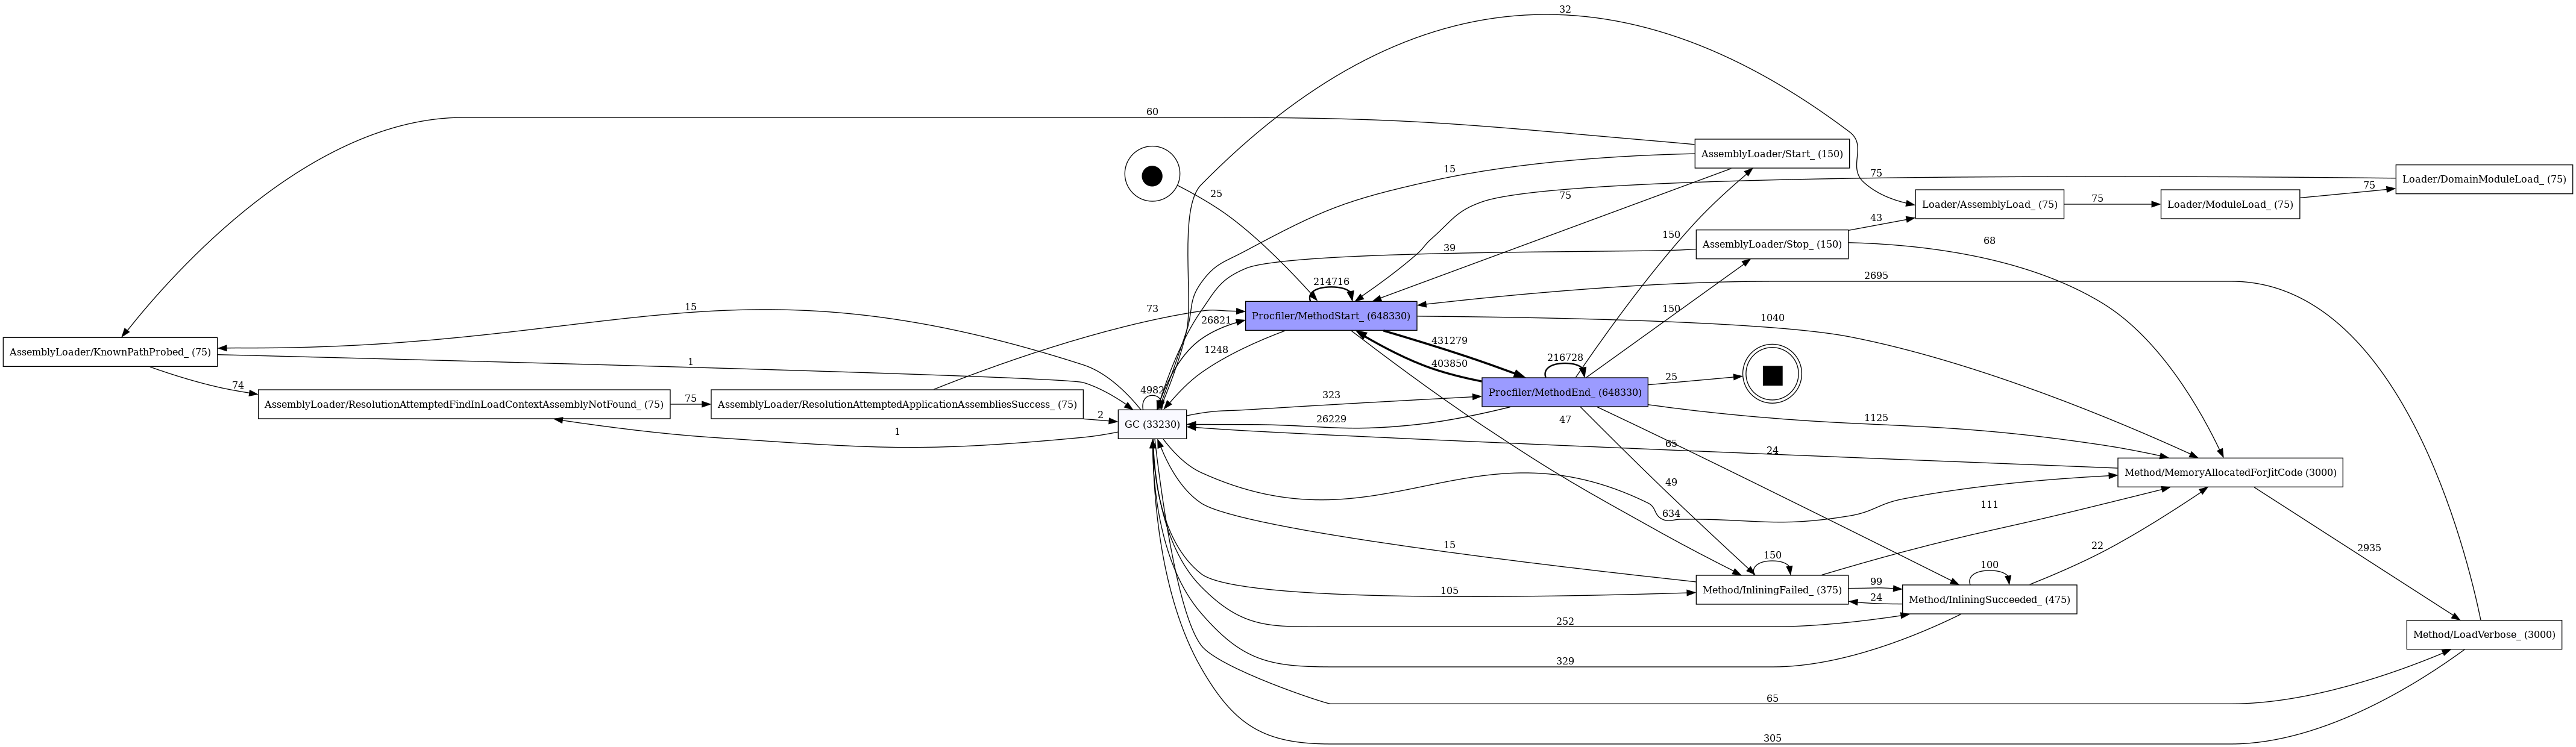

In [6]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

### Убираем GC так как он не несет смысловой нагрузки ###

In [25]:
log_no_gc = log[~log['concept:name'].str.contains('GC')]

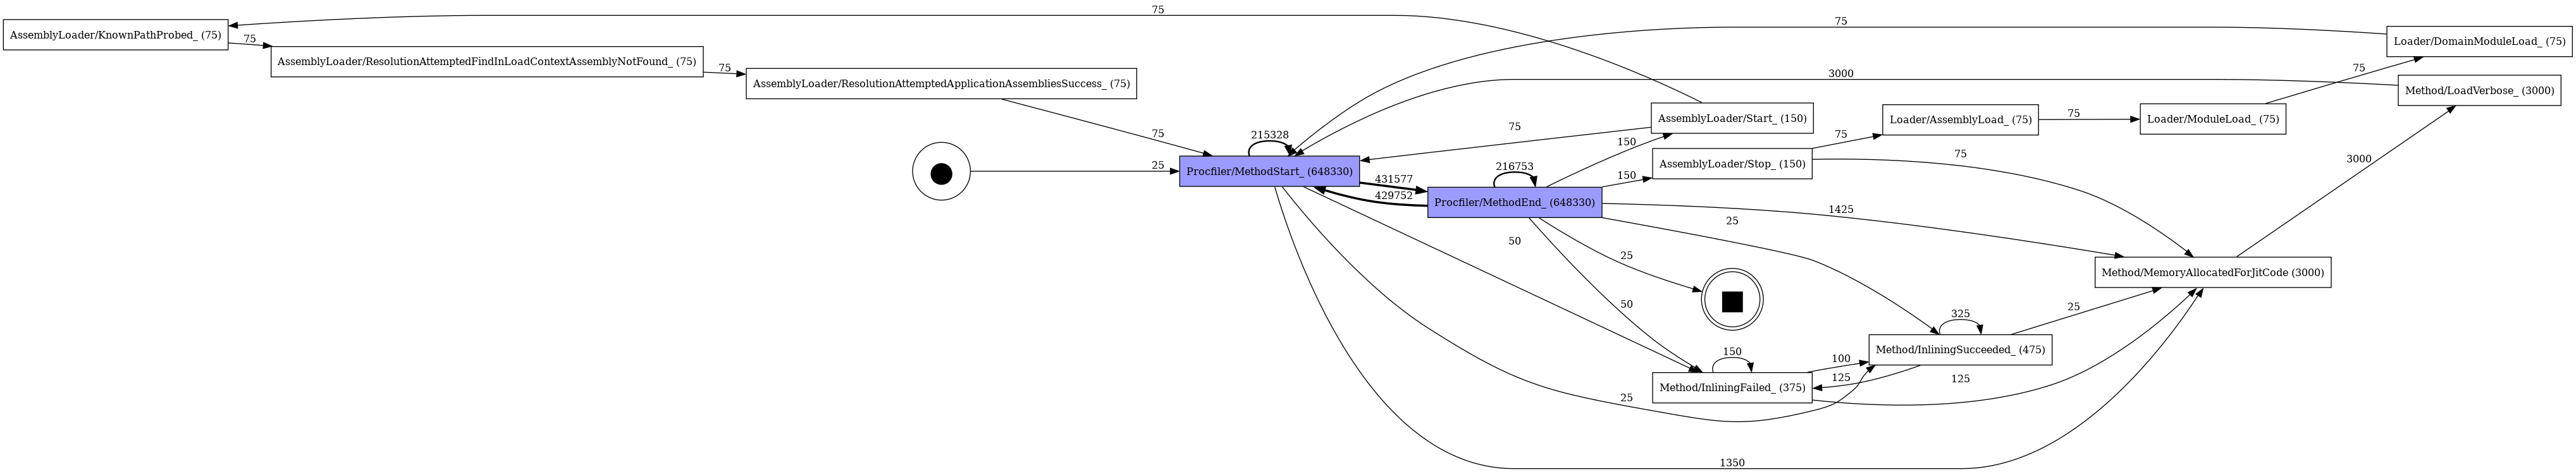

In [26]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_no_gc)
pm4py.view_dfg(dfg, start_activities, end_activities)

### Смотрим подробно на старт метода ###

#### Так же обрезая его самые популярные вызовы, чтобы было возможно анализировать граф ####

In [ ]:
from itertools import islice

def take(n, d):
    """Return the first n items of the iterable as a list."""
    return list(islice(d, n))

In [77]:
log_method_start = log[log['concept:name'].str.contains('Procfiler/MethodStart_')]

start_dict = log['concept:name'].value_counts().to_dict()
start_dict = dict(sorted(start_dict.items(), key=lambda x: x[1]), reverse=True)
top_2_percent = int(0.03 * len(start_dict))
print(top_2_percent)
reduced_start_dict = take(top_2_percent, start_dict)

log_method_start = log_method_start[log_method_start['concept:name'].isin(reduced_start_dict)]

18


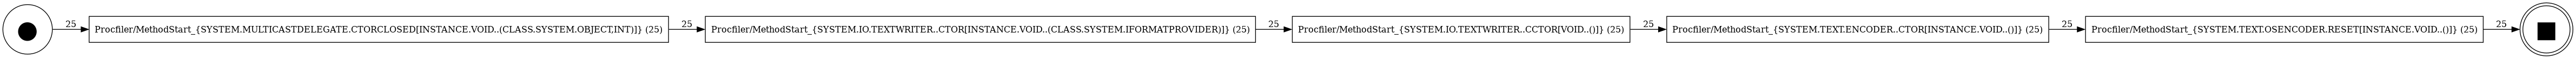

In [79]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_method_start)
pm4py.view_dfg(dfg, start_activities, end_activities)

### Смотрим подробно на конец метода ###

#### Так же обрезая его самые популярные вызовы, чтобы было возможно анализировать граф ####

In [78]:
log_method_end = log[log['concept:name'].str.contains('Procfiler/MethodEnd_')]

start_dict = log['concept:name'].value_counts().to_dict()
start_dict = dict(sorted(start_dict.items(), key=lambda x: x[1]), reverse=True)
top_2_percent = int(0.03 * len(start_dict))
print(top_2_percent)
reduced_end_dict = take(top_2_percent, start_dict)

log_method_end = log_method_end[log_method_end['concept:name'].isin(reduced_start_dict)]

18


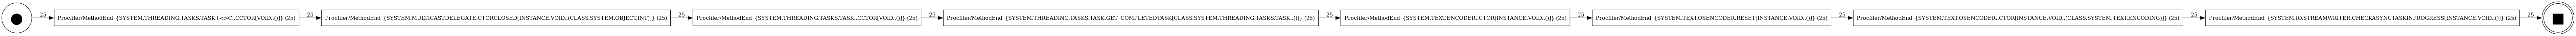

In [80]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_method_end)
pm4py.view_dfg(dfg, start_activities, end_activities)

### Попробуем подробно посмотреть на старт и конец вместе ###

In [91]:
start_and_end = pd.concat([log_method_start, log_method_end], ignore_index=True)

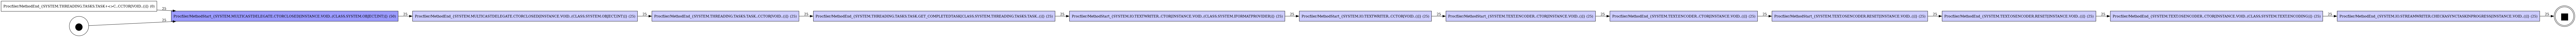

In [92]:
dfg, start_activities, end_activities = pm4py.discover_dfg(start_and_end)
pm4py.view_dfg(dfg, start_activities, end_activities)

### Больших знаний нам это не дало, попробуем в виде списка посмтреть на то, какие методы вообще мы запускаем ###

In [8]:
log[log['concept:name'].str.startswith('Procfiler/MethodStart_')]['concept:name'].unique()

array(['Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON]..CTOR[INSTANCE.VOID..()]}',
       'Procfiler/MethodStart_{SYSTEM.OBJECT..CTOR[INSTANCE.VOID..()]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON]..CCTOR[VOID..()]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADDWITHRESIZE[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].GROW[INSTANCE.VOID..(INT32)]}',
       'Procfiler/MethodStart_{SYSTEM.ARRAY.GET_MAXLENGTH[INT32..()]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].SET_CAPACITY[INSTANCE.VOID..(INT32)]}',
       'Procfiler/MethodStart_{SYSTEM.RUNTIME.COMPILERSERVICES.CASTHELPERS.STELEMREF[VOID.

#### Судя по методам, которые мы вызываем, а именно: ####

1. SYSTEM.COLLECTIONS.GENERIC.LIST 1[SYSTEM._CANON].ADD[INSTANCE.VOID..(!0)]
2. SYSTEM.COLLECTIONS.GENERIC.DICTIONARY 2[SYSTEM._CANON,SYSTEM._CANON].FINDVALUE[INSTANCE.!1&..(!0)]
3. SYSTEM.STRING.CONCAT[CLASS.SYSTEM.STRING..(CLASS.SYSTEM.STRING,CLASS.SYSTEM.STRING)
4. SYSTEM.RANDOM+THREADSAFERANDOM.NEXT[INSTANCE.INT32..(INT32)]
5. SYSTEM.THREADING.INTERLOCKED.ADD[INT64..(INT64&,INT64)]
6. SYSTEM.THREADING.TASKS.TASKFACTORY..CTOR[INSTANCE.VOID..()]
7. SYSTEM.CONSOLE.GET_OUT[CLASS.SYSTEM.IO.TEXTWRITER..()]

#### Можно определить направления, куда стоит обратить внимание: ####

1. В программе идет работа со списками, строками и словарями
2. В программе возможно реализована многопоточность
3. Программа выводит некоторый текст в консоль

### Разберемся с массивами ###

In [13]:
list_log = log[log['concept:name'].str.contains('SYSTEM.COLLECTIONS.GENERIC.LIST')]

In [37]:
list_log

,time:timestamp,concept:name,Event_ID,ManagedThreadId,case:concept:name,lifecycle:transition,concept:instance
2,2007-01-06 17:40:29.304240+00:00,Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENE...,10,4204,0,NaN,NaN
5,2007-01-06 17:40:29.304250+00:00,Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENE...,13,4204,0,NaN,NaN
7,2007-01-06 17:40:29.304277+00:00,Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERI...,15,4204,0,NaN,NaN
8,2007-01-06 17:40:29.304278+00:00,Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERI...,16,4204,0,NaN,NaN
10,2007-01-06 17:40:29.304288+00:00,Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENE...,18,4204,0,NaN,NaN
...,...,...,...,...,...,...,...
1334007,2007-01-06 17:47:28.318644+00:00,Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERI...,1334208,17316,24,NaN,NaN
1334009,2007-01-06 17:47:28.318680+00:00,Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENE...,1334210,17316,24,NaN,NaN
1334012,2007-01-06 17:47:28.318681+00:00,Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERI...,1334213,17316,24,NaN,NaN
1334013,2007-01-06 17:47:28.318681+00:00,Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENE...,1334214,17316,24,NaN,NaN


In [26]:
list_log.iloc[:30]['concept:name'].to_numpy()

array(['Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON]..CTOR[INSTANCE.VOID..()]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON]..CCTOR[VOID..()]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON]..CCTOR[VOID..()]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON]..CTOR[INSTANCE.VOID..()]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADDWITHRESIZE[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].GROW[INSTANCE.VOID..(INT32)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].SET_CAPACITY[INSTANCE.VOID..(INT32)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].SET_CAPACITY[INSTANCE.VOID..(INT32)]}',
   

In [27]:
list_log.iloc[-30:]['concept:name'].to_numpy()

array(['Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodEnd

#### Посмотрев на метода работы с листом в начале и в конце программы, можно сделать предположение, что в него просто добавлялись значения, по ходу чего проводилась реаллокация памяти листа ####

##### Так же, стоит посмотреть на случайные операции с листом и на то, сколько раз в него добавлялись значения #####

In [28]:
list_log.sample(30)['concept:name'].to_numpy()

array(['Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].REMOVEAT[INSTANCE.VOID..(INT32)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].GET_COUNT[INSTANCE.INT32..()]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].GET_COUNT[INSTANCE.INT32..()]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].GET_COUNT[INSTANCE.INT32..()]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].REMOVEAT[INSTANCE.VOID..(INT32)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].GET_COUNT[INSTANCE.INT32..()]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.LIST`1[SYSTEM.__CANON].ADD[INSTANCE.VOID..(!0)]}

#### Видно, что из листа так же удалялись значения, посмотрим и на их кол-во ####

##### Из графа видно, что мы создаем массив 25 раз, суммарно добавляем в него 25_000 элементов и удаляем 20_000 элементов, а так же 25 раз печатаем Capacity массива. ##### 
##### Это наталкивает на мысль, что это делается в цикле 25 раз или метод, где это делается, запускается 25 раз - вот и вопрос для дальнейшего исследования ##### 

/opt/conda/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


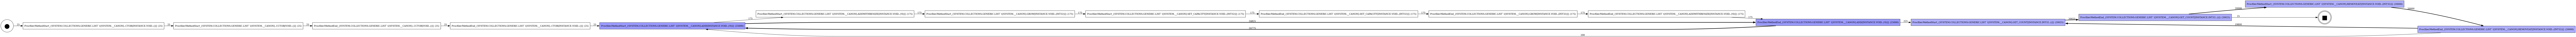

In [38]:
dfg, start_activities, end_activities = pm4py.discover_dfg(list_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

#### Проделаем все то же самое со словарем и со строками ####

In [39]:
dict_log = log[log['concept:name'].str.contains('SYSTEM.COLLECTIONS.GENERIC.DICTIONARY')]

In [41]:
dict_log['concept:name'].to_numpy()

array(['Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.DICTIONARY`2[SYSTEM.__CANON,SYSTEM.__CANON].TRYGETVALUE[INSTANCE.BOOL..(!0,!1&)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.DICTIONARY`2[SYSTEM.__CANON,SYSTEM.__CANON].FINDVALUE[INSTANCE.!1&..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.DICTIONARY`2[SYSTEM.__CANON,SYSTEM.__CANON].FINDVALUE[INSTANCE.!1&..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.DICTIONARY`2[SYSTEM.__CANON,SYSTEM.__CANON].TRYGETVALUE[INSTANCE.BOOL..(!0,!1&)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.DICTIONARY`2[SYSTEM.__CANON,SYSTEM.__CANON].TRYGETVALUE[INSTANCE.BOOL..(!0,!1&)]}',
       'Procfiler/MethodStart_{SYSTEM.COLLECTIONS.GENERIC.DICTIONARY`2[SYSTEM.__CANON,SYSTEM.__CANON].FINDVALUE[INSTANCE.!1&..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLLECTIONS.GENERIC.DICTIONARY`2[SYSTEM.__CANON,SYSTEM.__CANON].FINDVALUE[INSTANCE.!1&..(!0)]}',
       'Procfiler/MethodEnd_{SYSTEM.COLL

#### Поведение работы со словарем кажется странным, так как кажется, что мы только пытамся достать из него значение, но не пытаемся его туда положить. Так же отметим, что видимо словарь создается в том же цикле/методе, которые запускается 25 раз. ####
#### Возможно словарь инициализируется константными значениями и до/после работы основного алгоритма (например работа с вышеупомянутым массивом), мы проверяем, лежит ли какой-то элемент в эталонном словаре. Однако в этом случае создание константного словаря 25 раз - не лучшая практика. Поэтому этот вопрос так же можно вынести на исследование ####

/opt/conda/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


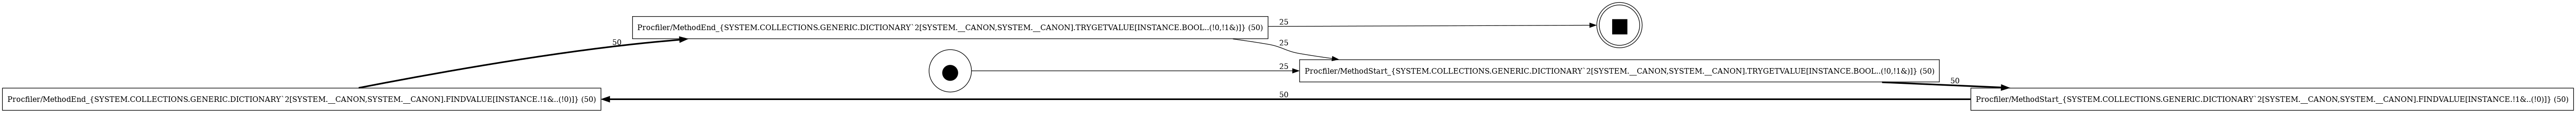

In [42]:
dfg, start_activities, end_activities = pm4py.discover_dfg(dict_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

#### Посмотрим на строки ####

In [44]:
string_log = log[log['concept:name'].str.contains('SYSTEM.STRING')]

In [45]:
string_log

,time:timestamp,concept:name,Event_ID,ManagedThreadId,case:concept:name,lifecycle:transition,concept:instance
0,2007-01-06 17:40:29.304156+00:00,Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM....,8,4204,0,NaN,NaN
50145,2007-01-06 17:40:29.346043+00:00,Procfiler/MethodStart_{SYSTEM.STRING.ENDSWITH[...,50153,4204,0,NaN,NaN
50146,2007-01-06 17:40:29.346043+00:00,Procfiler/MethodStart_{SYSTEM.STRING.GET_LENGT...,50154,4204,0,NaN,NaN
50147,2007-01-06 17:40:29.346044+00:00,Procfiler/MethodEnd_{SYSTEM.STRING.GET_LENGTH[...,50155,4204,0,NaN,NaN
50148,2007-01-06 17:40:29.346044+00:00,Procfiler/MethodStart_{SYSTEM.STRING.GET_LENGT...,50156,4204,0,NaN,NaN
...,...,...,...,...,...,...,...
1337293,2007-01-06 17:47:28.336251+00:00,Procfiler/MethodEnd_{SYSTEM.STRING.GET_LENGTH[...,1337494,17316,24,NaN,NaN
1337306,2007-01-06 17:47:28.336252+00:00,Procfiler/MethodEnd_{SYSTEM.STRING.FILLSTRINGC...,1337507,17316,24,NaN,NaN
1337307,2007-01-06 17:47:28.336253+00:00,Procfiler/MethodEnd_{SYSTEM.STRING.CONCAT[CLAS...,1337508,17316,24,NaN,NaN
1337391,2007-01-06 17:47:28.336956+00:00,Procfiler/MethodEnd_{SYSTEM.IO.STREAMWRITER.WR...,1337592,17316,24,NaN,NaN


In [46]:
string_log['concept:name'].unique()

array(['Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}',
       'Procfiler/MethodStart_{SYSTEM.STRING.ENDSWITH[INSTANCE.BOOL..(CLASS.SYSTEM.STRING,VALUE.CLASS.SYSTEM.STRINGCOMPARISON)]}',
       'Procfiler/MethodStart_{SYSTEM.STRING.GET_LENGTH[INSTANCE.INT32..()]}',
       'Procfiler/MethodEnd_{SYSTEM.STRING.GET_LENGTH[INSTANCE.INT32..()]}',
       'Procfiler/MethodStart_{SYSTEM.MEMORYEXTENSIONS.ASSPAN[VALUE.CLASS.SYSTEM.READONLYSPAN`1<WCHAR>..(CLASS.SYSTEM.STRING,INT32)]}',
       'Procfiler/MethodStart_{SYSTEM.STRING.GETRAWSTRINGDATA[INSTANCE.WCHAR&..()]}',
       'Procfiler/MethodEnd_{SYSTEM.STRING.GETRAWSTRINGDATA[INSTANCE.WCHAR&..()]}',
       'Procfiler/MethodEnd_{SYSTEM.MEMORYEXTENSIONS.ASSPAN[VALUE.CLASS.SYSTEM.READONLYSPAN`1<WCHAR>..(CLASS.SYSTEM.STRING,INT32)]}',
       'Procfiler/MethodStart_{SYSTEM.STRING.OP_IMPLICIT[VALUE.CLASS.SYSTEM.READONLYSPAN`1<WCHAR>..(CLASS.SYSTEM.STRING)]}',
       'Procfiler/MethodEnd_{SYSTEM.STRING.OP_IMPLICIT[

/opt/conda/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


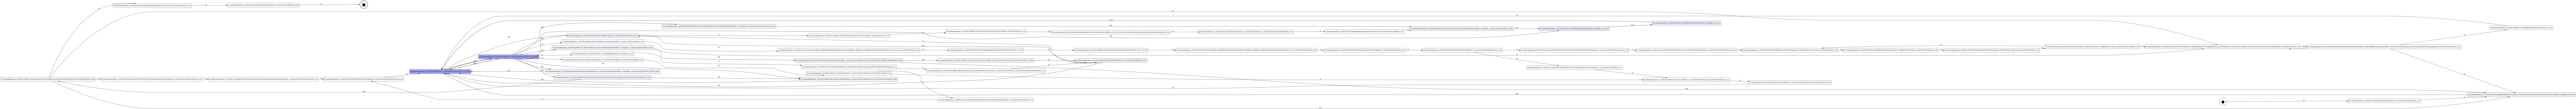

In [47]:
dfg, start_activities, end_activities = pm4py.discover_dfg(string_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

##### Из этих данных тяжело что-либо сказать, однако мы видим интересную вещь - Main класс, а вернее его инициализацию с параметрами строки, попробуем посмотреть на него подробнее #####

In [48]:
main_log = log[log['concept:name'].str.contains('LOHALLOCATIONS.PROGRAM.MAIN')]

Всего 50 штук

In [53]:
main_log.shape, main_log.head()

((50, 7),
                          time:timestamp  \
 0      2007-01-06 17:40:29.304156+00:00   
 53656  2007-01-06 17:40:29.390069+00:00   
 53657  2007-01-06 17:40:47.215806+00:00   
 107211 2007-01-06 17:40:47.266941+00:00   
 107212 2007-01-06 17:41:09.347228+00:00   
 
                                              concept:name Event_ID  \
 0       Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM....        8   
 53656   Procfiler/MethodEnd_{LOHALLOCATIONS.PROGRAM.MA...    53664   
 53657   Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM....    53674   
 107211  Procfiler/MethodEnd_{LOHALLOCATIONS.PROGRAM.MA...   107228   
 107212  Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM....   107237   
 
        ManagedThreadId case:concept:name lifecycle:transition concept:instance  
 0                 4204                 0                  NaN              NaN  
 53656             4204                 0                  NaN              NaN  
 53657             8224                 1         

In [52]:
main_log['concept:name'].unique(), main_log['concept:name'].value_counts()

(array(['Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}',
        'Procfiler/MethodEnd_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}'],
       dtype=object),
 concept:name
 Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}    25
 Procfiler/MethodEnd_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}      25
 Name: count, dtype: int64)

#### Интересно, получается, что мы вызываем метод Main 25 раз, возможно с разными параметрами char* argv[], так как массив и словарь содержат в себе целочисленные значения, а не строковые. А значит с ними не идем логической работы. Так же еще одним вариантом работы со строками являются Consol.Print. Это стоит проверить ####

SANDBOX 

In [ ]:
map = pm4py.discover_heuristics_net(log.sample(10000, random_state=5))
pm4py.view_heuristics_net(map)

In [11]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Procfiler/MethodStart_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}': 25}
End activities: {'Procfiler/MethodEnd_{LOHALLOCATIONS.PROGRAM.MAIN[VOID..(CLASS.SYSTEM.STRING[])]}': 25}
